In [8]:
import numpy as np
import acalib
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
c = acalib.Container()
c.load_fits('../../bindata/fits/cubes/Orion.methanol.cbc.contsub.image.fits')
#c.load_fits('../bindata/fits/cubes/M100line.image.fits')

cube = c.primary

#Better results with threshold

rms = acalib.noise_level(cube)
cube = acalib.denoise(cube, threshold=rms)

INFO: Processing HDU 0 (Image) [acalib.io.fits]
INFO: 4D data detected: assuming RA-DEC-FREQ-STOKES (like CASA-generated ones), and dropping STOKES [acalib.io.fits]


In [10]:
#Creating Spectra Sketcher
import acalib.core as cr
spectra,slices= cr.spectra_sketch(cube.data,10000)

[slice(0, 26, None)]

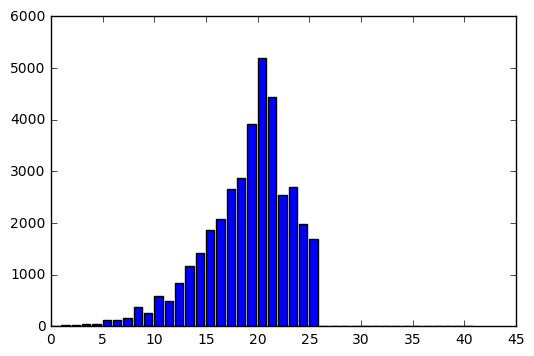

In [11]:
#Getting frecuencies
xs = cube.data.shape[1]
ys = cube.data.shape[2]
frecs_len = cube.data.shape[0]
frecs = range(frecs_len)

#Plotting spectra
plt.bar(frecs,spectra)
slices

In [12]:
idx=acalib.Indexing()
print(idx.config)
idx.config['PRECISION']=0.01
idx.config['SAMPLES']=int(100)
cont=idx.run(cube)

{'P': 0.05, 'RANDOM_STATE': None, 'PRECISION': 0.02, 'SAMPLES': 1000}
INFO: overwriting NDData's current wcs with specified wcs. [astropy.nddata.nddata]


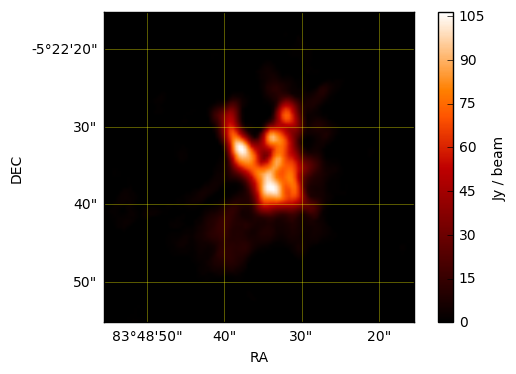

3


In [13]:
acalib.visualize(acalib.moment0(cont.primary))
print(len(cont.images))

1


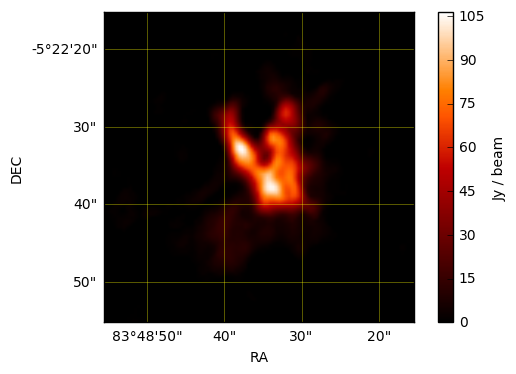

2


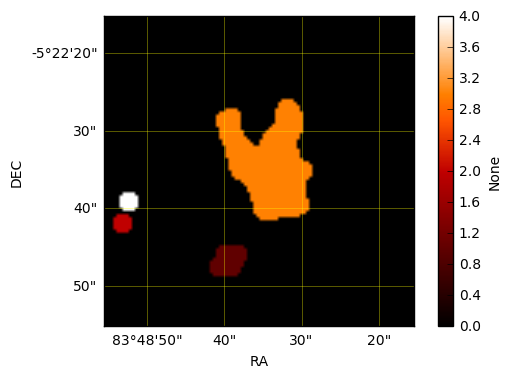

  CentroidRa   CentroidDec  MajorAxisLength ...  MinIntensity  AverageIntensity
------------- ------------- --------------- ... -------------- ----------------
20.4848484848 39.5454545455   13.0730020002 ...  4.28527140617    9.30509588995
         32.5           5.5   6.32455532034 ... 0.766435801983    1.87432158925
      52.1875 52.6942934783   40.2995749254 ...   11.838467896    52.5973899172
         39.5           7.5   6.32455532034 ... 0.729126811028    2.16678612493


In [14]:
for i in range(1,len(cont.images)):
    print(i)
    acalib.visualize(cont.images[i])
    plt.show()
for i in range(len(cont.tables)):
    print(cont.tables[i])